### Installing requirements

The next cell will install/update all required packages for this project:

In [21]:
#to reflect changes made in modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
!pip -q install --upgrade -r ../requirements.txt
print("Packages successfully installed and up-to-date.")

Packages successfully installed and up-to-date.


### Setting API keys and creating class instances

**YT_KEY** = your YouTube API Key.<br>
**DB_KEY** remain unchanged.

In [23]:
DB_KEY =  
YT_KEY = 

In [24]:
import os, sys
sys.path.append(os.path.join(sys.path[0], '../'))

from wildbook_social import YouTube, Database

db = Database(DB_KEY, 'youtube')
yt = YouTube(YT_KEY, db)

### Specify query term and how many videos to query

In [25]:
#uncomment the appropriate query and saveTo term for the species you wish to retrieve results from

query = "Humpback Whales -octonauts, -my top 10, -facts, -learning, -kids, -draw, -art, -cartoon, -toy, -songs, -album, -games"
saveTo = "humpback whales"
# saveTo = "humpback whales time frame"

# as of 1.02.20 - hit capacity of total whale shark videos 
#as of 3.15.20 - have gone through all 343 docs in db FIXME: see if we can gather more results 
# query = 'whale sharks'# -octonauts, -top 10, -basking, -megalodon, -kids, -cartoon, -feed and grow fish, -pungence, -DIY, -toys, -draw, -gameplay, -hungry shark world, -manta ray, -white shark, -blue'
# saveTo = 'whale sharks'
# saveTo = "new whale sharks test"
# saveTo = 'whale sharks within timeframe'

# query = 'iberian lynx |lince ibérico -Apex, -LRH, -Playoffs, -Game, -Draw, -Floor, -Music, -Sport, -Puzzle, -MMA, -felt, -kids, -eurasian, -documentary'
# saveTo = 'iberian lynx'

# query = 'giraffe -diy, -top 10, -kids, -children, -peppa pig, -compilation'#'reticulated giraffe'
# saveTo = 'Reticulated Giraffe'

# query = "zebra|zebras -warhol, -diy, -DIY, -tutorial, -V3, -V2, -facts"
# saveTo = 'grevys zebra'

# use this one
# query = 'grevys zebra -song, -octonauts, -reviews, -campaign, -facts, -kids, -tycoon, -green, -cartoon, -trust, -pronunciation, -Andy Warhol'
# query = "grevy's zebra|zebra|zebras -warhol, -diy, -DIY, -tutorial, -V3, -V2,-songs, -music, -madagascar 3, -song, -octonauts, -reviews, -campaign, -facts, -kids, -tycoon, -green, -cartoon, -trust, -pronunciation, -Andy Warhol"
# saveTo = 'grevys zebra'


# query = "zebra|zebras|plains zebra|common zebra, -warhol, -diy, -DIY, -tutorial, -V3, -V2, -facts, -wildebeests,-lions, -migration"
# saveTo = 'plains zebras'

#can change this value for user preferences (depending on how many results needed)
howManyVideosToQuery = 50 #900

### Querying and saving

The next cell will query the videos from YouTube and automatically save them into MongoDB:

In [26]:
res = yt.search(q=query, limit=howManyVideosToQuery, saveTo=saveTo)

Working with page 1
Done!


### Doing statistics

The next cell will run script to get unchecked videos from database one by one for manual checking:

1: Humpback Whales Maui Hawaii


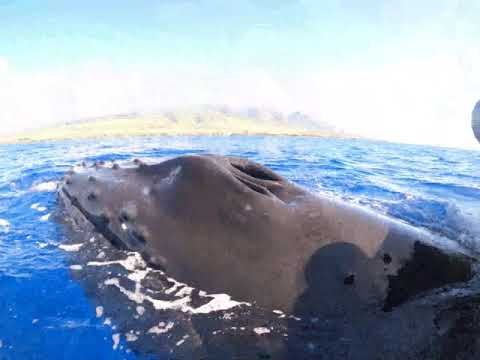

Relevant (y/n): 

In [ ]:
forQuery = saveTo #query the same collection you are saving data to

howManyVideosToGoOver = 1

db.doStatistics(forQuery, howManyVideosToGoOver)

In [28]:
#db.getLocations("whale sharks test", howManyVideosToGoOver)

With the next command you can see the statistics for passed collection (query term) as a parameter:

Out of 5 items, 80.0% are relevant.From those that are relevant, 100.0% are wild. Out of the total, 80.0% are wild


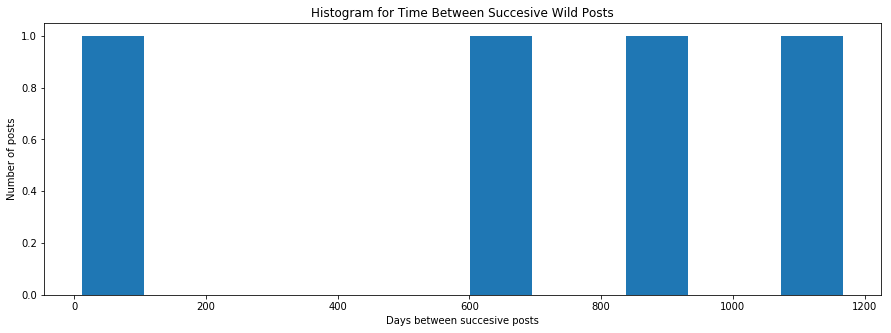

In [29]:
db.showStatistics(forQuery)

In [30]:
listOfDates = db.gatherDates(saveTo, YYYY = 2019, MM = 6, DD = 1) # entire list of dates of all posts within time fram
postsPerWeekDict = db.postsPerWeek(YYYY = 2019, MM = 6, DD = 1) # dict = {week date : count of posts}
smas = db.movingAveragePosts(3) #simple moving average data points

print('\n')
print(listOfDates)
print('\n')
print(postsPerWeekDict)
# for key in postsPerWeekDict.keys():
#     print(key)

print('\n')
print(smas)
print('\n')
for item in smas:
    print(item)



week number dictionary: 
 {1: datetime.date(2019, 6, 1), 2: datetime.date(2019, 6, 8), 3: datetime.date(2019, 6, 15), 4: datetime.date(2019, 6, 22), 5: datetime.date(2019, 6, 29), 6: datetime.date(2019, 7, 6), 7: datetime.date(2019, 7, 13), 8: datetime.date(2019, 7, 20), 9: datetime.date(2019, 7, 27), 10: datetime.date(2019, 8, 3), 11: datetime.date(2019, 8, 10), 12: datetime.date(2019, 8, 17), 13: datetime.date(2019, 8, 24), 14: datetime.date(2019, 8, 31), 15: datetime.date(2019, 9, 7), 16: datetime.date(2019, 9, 14), 17: datetime.date(2019, 9, 21), 18: datetime.date(2019, 9, 28), 19: datetime.date(2019, 10, 5), 20: datetime.date(2019, 10, 12), 21: datetime.date(2019, 10, 19), 22: datetime.date(2019, 10, 26), 23: datetime.date(2019, 11, 2), 24: datetime.date(2019, 11, 9), 25: datetime.date(2019, 11, 16), 26: datetime.date(2019, 11, 23), 27: datetime.date(2019, 11, 30), 28: datetime.date(2019, 12, 7), 29: datetime.date(2019, 12, 14), 30: datetime.date(2019, 12, 21), 31: datetime.date

In [31]:
# uncomment the appropriate csvName to save all your filtered result locations in a csv folder

# csvName = 'humpbackWhales'

# csvName = 'whaleSharks'
# csvName = 'new whale sharks'

# csvName = 'iberianLynx'

# csvName = 'grevysZebra'

# csvName = 'retGiraffe'

# csvName = 'plainsZebra'

# db.heatmap(saveTo, csvName)




In [32]:
# get user countries
# collection = saveTo + ' wild'
# listOfVideoIDs = db.getUserCountriesIDs(collection)
# # print(listOfVideoIDs)
# csvFile = 'humpbackWhalesUsers'
# yt.channelToCountry(listOfVideoIDs, saveTo, csvFile)


In [33]:
# https://www.google.com/maps/d/u/0/ 

In [34]:
#retrieve all wild documents from current database('saveTo') and store in new db consisting only of wild documents
db.relevantDocuments(saveTo)

#for the new whale sharks test collection (to merge both wild collections)
# saveTo = 'whale sharks'
# db.relevantDocuments(saveTo)

In [35]:
db.close()